In [1]:
import numpy as np
import scipy.stats as sps

In [22]:
sample1 = sps.norm(loc = 1, scale = 2).rvs(size = 100)
sample2 = sps.uniform(loc = 0, scale = 2).rvs(size = 150)
sample3 = sps.norm(loc = 1, scale = 3).rvs(size = 200)

np.savetxt("sample1.csv", sample1)
np.savetxt("sample2.csv", sample2)
np.savetxt("sample3.csv", sample3)

print(sample1[:5])
print(sample2[:5])
print(sample3[:5])

[ 3.78948215 -1.14100098  2.42258135  1.9456438  -1.54218553]
[0.18189962 1.86620996 1.58223737 0.80296829 1.77982024]
[ 2.33698084 -5.63034647  2.95611843 -1.67214873 -0.35005505]


In [2]:
sample1 = np.genfromtxt('sample1.csv')
sample2 = np.genfromtxt('sample2.csv')
sample3 = np.genfromtxt('sample3.csv')

print(sample1[:5])
print(sample2[:5])
print(sample3[:5])

[ 3.78948215 -1.14100098  2.42258135  1.9456438  -1.54218553]
[0.18189962 1.86620996 1.58223737 0.80296829 1.77982024]
[ 2.33698084 -5.63034647  2.95611843 -1.67214873 -0.35005505]


In [3]:
def sample_value(sample, n):
    sample_mean = sample.mean()
    sample_var = sample.var() * n / (n - 1) 
    sample_std = sample_var ** (0.5)

    print("\tmean: %.3f" %sample_mean)
    print('\ts^2: %.3f' %sample_var)
    print("\ts: %.3f" %sample_std)

In [4]:
#1
print("X1:")
sample_value(sample1, 100)

print("X2:")
sample_value(sample2, 150)

print("X3:")
sample_value(sample3, 200)

sample_pooled = np.concatenate([sample1, sample2, sample3])
print("Pooled:")
sample_value(sample_pooled, 100 + 150 + 200)


X1:
	mean: 1.000
	s^2: 3.659
	s: 1.913
X2:
	mean: 0.976
	s^2: 0.352
	s: 0.593
X3:
	mean: 0.651
	s^2: 9.360
	s: 3.059
Pooled:
	mean: 0.837
	s^2: 5.100
	s: 2.258


In [5]:
import matplotlib.pyplot as plt

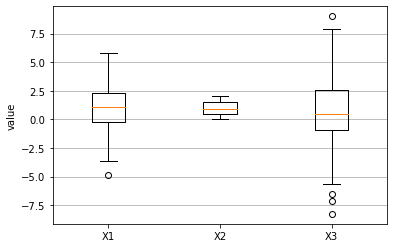

In [6]:
#2
plt.boxplot([sample1, sample2, sample3])
plt.xticks([1, 2, 3], ['X1', 'X2', 'X3'])
plt.grid(axis = 'y')
plt.ylabel("value")
plt.show()

In [7]:
#3
statistic, p_value = sps.bartlett(sample1, sample2, sample3)
print("statistic: %.3f" %statistic)
print("p_value: %.3f" %p_value)

statistic: 308.941
p_value: 0.000


In [9]:
#4
n = [100, 150, 200]
sample_means = [sample1.mean(), sample2.mean(), sample3.mean()]
sample_vars = [sample1.var(), sample2.var(), sample3.var()]

n_pooled = sum(n)
pooled_mean = sample_pooled.mean()
pooled_var = sample_pooled.var()

D_b = 0
D_w = 0

for i in range(3):
    D_b += (n[i] * ((sample_means[i] - pooled_mean)**2))
    D_w += (n[i] * sample_vars[i])

D_b /= n_pooled
D_w /= n_pooled

coef_determ = D_b / pooled_var
coef_corr = coef_determ**(0.5)

statistic, p_value = sps.f_oneway(sample1, sample2, sample3)

print("Grouping characteristic:")
print("\tvalue: %.3f" %D_b)
print("\tfreedom degree: 2")
print("\tunbiased value: %.3f" %((n_pooled / 2) * D_b))
print("\n")

print("residual characteristic:")
print("\tvalue: %.3f" %D_w)
print("\tfreedom degree: %i" %(n_pooled - 3))
print("\tunbiased value: %.3f" %(n_pooled / (n_pooled - 3) * D_w))
print("\n")

print("all characteristic:")
print("\tvalue: %.3f" %pooled_var)
print("\tfreedom degree: %i" %(n_pooled - 1))
print("\tunbiased value: %.3f" %(n_pooled / (n_pooled - 1) * pooled_var))
print("\n")

print("coefficient of determination: %.3f" %coef_determ)
print("coefficient of correlation: %.3f" %coef_corr)
print("\n")

print("statistic: %.3f" %statistic)
print("p_value: %.3f" %p_value)

Grouping characteristic:
	value: 0.028
	freedom degree: 2
	unbiased value: 6.235


residual characteristic:
	value: 5.060
	freedom degree: 447
	unbiased value: 5.094


all characteristic:
	value: 5.088
	freedom degree: 449
	unbiased value: 5.100


coefficient of determination: 0.005
coefficient of correlation: 0.074


statistic: 1.224
p_value: 0.295


In [44]:
n = [100, 150, 200]
sample_vars = [sample1.var(), sample2.var(), sample3.var()]
n_pooled = sum(n)

D_w = 0

for i in range(3):
    D_w += (n[i] * sample_vars[i])

D_w /= n_pooled

def scheffe_method(sample1, sample2, alpha):
    sample_c = sample1.mean() - sample2.mean()

    var_c = 0
    for i in range(2):
        var_c += (1 / n[i])
    var_c *= ((n_pooled * D_w) / (n_pooled - 3))

    scale = (var_c * 2 * sps.f.ppf(1 - alpha, 2, n_pooled - 3))**(0.5)
    return (sample_c - scale, sample_c + scale) 

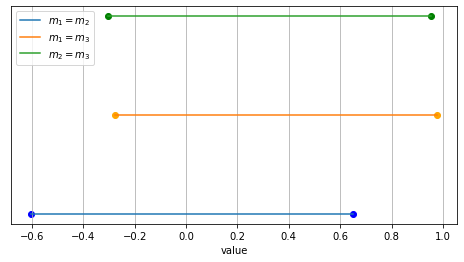

In [45]:
#5
l12, r12 = scheffe_method(sample1, sample2, 0.1)   
l13, r13 = scheffe_method(sample1, sample3, 0.1)   
l23, r23 = scheffe_method(sample2, sample3, 0.1)   

segment1 = [(l12, 1), (r12, 1)]
segment2 = [(l13, 2), (r13, 2)]
segment3 = [(l23, 3), (r23, 3)]

x1, y1 = zip(*segment1)
x2, y2 = zip(*segment2)
x3, y3 = zip(*segment3)

plt.figure(figsize=(8, 4))

plt.plot(x1, y1, label='$m_1 = m_2$')
plt.plot(x2, y2, label='$m_1 = m_3$')
plt.plot(x3, y3, label='$m_2 = m_3$')

plt.scatter(*zip(*segment1), color='blue', marker='o')
plt.scatter(*zip(*segment2), color='orange', marker='o')
plt.scatter(*zip(*segment3), color='green', marker='o')

ax = plt.gca ()
ax.get_yaxis ().set_visible (False) 

plt.xlabel('value')
plt.legend()
plt.grid(True)
plt.show()


In [23]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import random

In [51]:
tukey = pairwise_tukeyhsd(groups = (["X1"] * 100 + ["X2"] * 100 + ["X3"] * 100), endog = (list(sample1) + random.sample(list(sample2), 100) + random.sample(list(sample3), 100)), alpha = 0.1)
print(tukey)

Multiple Comparison of Means - Tukey HSD, FWER=0.10
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    X1     X2   0.0308    0.9   -0.59 0.6516  False
    X1     X3   -0.229 0.7094 -0.8499 0.3918  False
    X2     X3  -0.2599 0.6509 -0.8807  0.361  False
---------------------------------------------------
